# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

I Etap

In [2]:
if not os.path.exists("100zloty.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

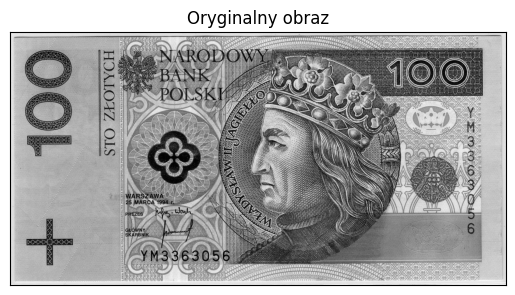

In [3]:
I = cv2.imread('100zloty.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) 
I = I.astype('uint8')
plt.imshow(I)
plt.gray()
plt.xticks([]), plt.yticks([]), plt.title('Oryginalny obraz')
plt.show()

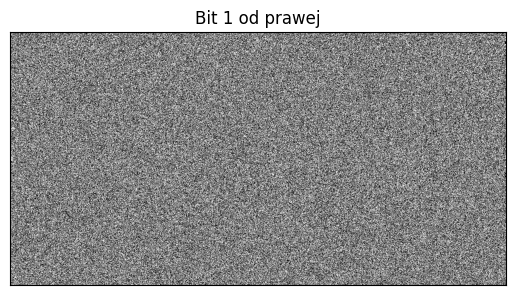

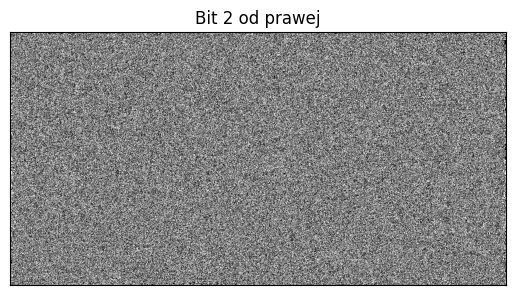

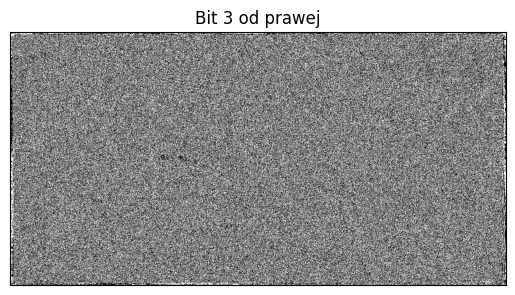

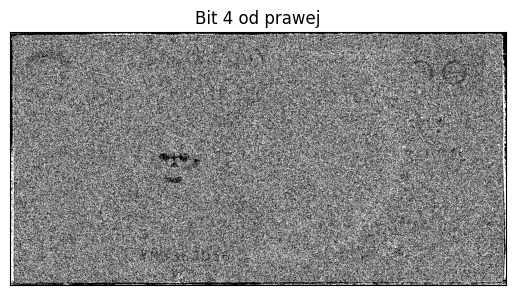

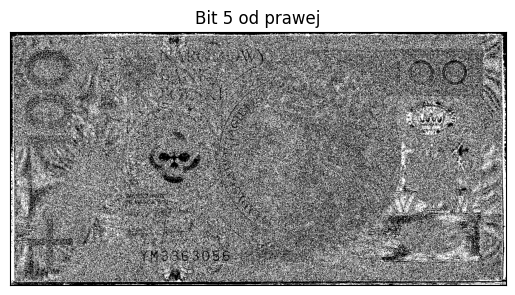

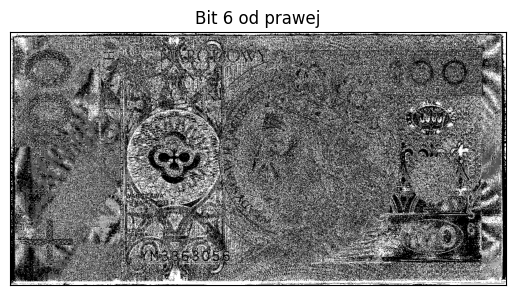

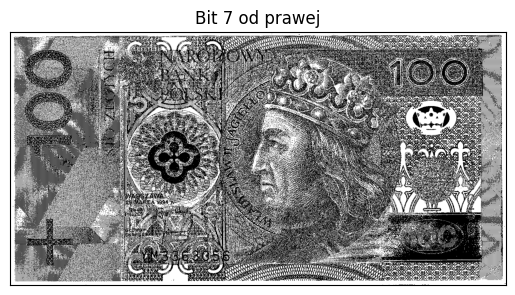

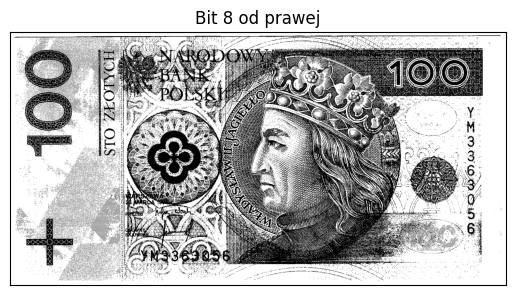

In [4]:
all_images = []
for bit in range(1,9):
    I = cv2.imread('100zloty.jpg')
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY) 
    I = I.astype('uint8')
    for i in range(len(I)):
        for j in range(len(I[0])):
            binary_val = bin(I[i][j])
            binary_val = binary_val[2:]
            if len(binary_val) < bit:
                I[i][j] = 0
            else:
                if bit == 1:
                    binary_val = len(binary_val[2:-bit])*'0'+binary_val[-bit]+len(binary_val[-bit:])*'0'
                    I[i][j] = int(binary_val,2)
                else:
                    binary_val = len(binary_val[2:-bit])*'0'+binary_val[-bit]+len(binary_val[-bit+1:])*'0'
                    I[i][j] = int(binary_val,2)
    all_images.append(I)
    plt.imshow(I)
    plt.gray()
    plt.xticks([]), plt.yticks([]), plt.title('Bit {} od prawej'.format(bit))
    plt.show()

Z powyższych obrazów wynika, że najbardziej ważne są najstarsze bity.

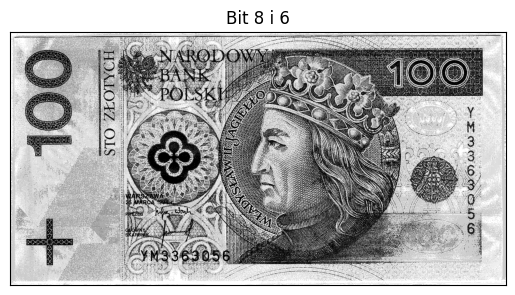

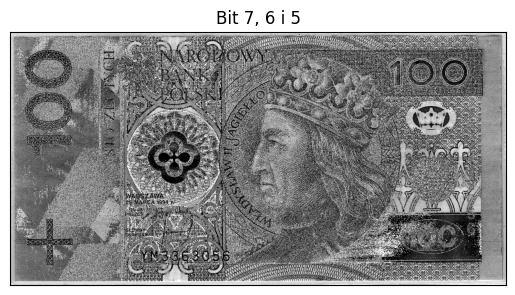

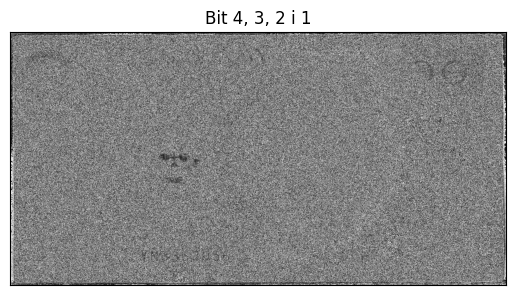

In [5]:

im = all_images[7] + all_images[5]
plt.imshow(im)
plt.gray()
plt.xticks([]), plt.yticks([]), plt.title('Bit 8 i 6')
plt.show()

im = all_images[6] + all_images[5] + all_images[4]
plt.imshow(im)
plt.gray()
plt.xticks([]), plt.yticks([]), plt.title('Bit 7, 6 i 5')
plt.show()

im = all_images[0] + all_images[1] + all_images[2] + all_images[3]
plt.imshow(im)
plt.gray()
plt.xticks([]), plt.yticks([]), plt.title('Bit 4, 3, 2 i 1')
plt.show()